(60000, 784)
(60000, 784)
Epoch 0 cost:  2.303348273740673
Epoch 100 cost:  0.7852521280336859
Epoch 200 cost:  0.5886607951440076
Epoch 300 cost:  0.5332064026869466
Epoch 400 cost:  0.48689933835326554
Epoch 500 cost:  0.46011445284881336
Epoch 600 cost:  0.44048239704212694
Epoch 700 cost:  0.4263060949883653
Epoch 800 cost:  0.4300946213162338
Epoch 900 cost:  0.404424382352302
CALCULATED VALUE OF ACCURACY, PRECISION AND RECALL ON TEST DATA FOR FASHION-MNIST DATASET
------------------------------------------------------------------------------------------
ACCURACY VALUE: 0.97023
PRECISION VALUE: 0.9875
RECALL VALUE: 0.9795871129873136






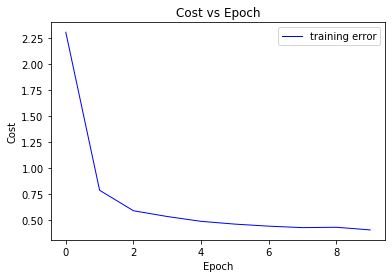

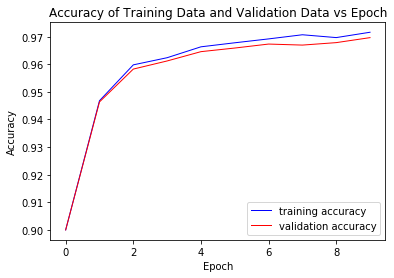

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s 36us/step - loss: 1.9008 - accuracy: 0.5027 - val_loss: 1.5538 - val_accuracy: 0.6520
Epoch 2/100
48000/48000 [==============================] - 1s 30us/step - loss: 1.3621 - accuracy: 0.6952 - val_loss: 1.1982 - val_accuracy: 0.7160
Epoch 3/100
48000/48000 [=======

KeyboardInterrupt: 

In [11]:
import copy
import numpy as np
import util_mnist_reader
import sklearn
from sklearn.metrics import classification_report, multilabel_confusion_matrix
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D

np.seterr(divide='ignore', invalid='ignore')


#this function returns regularised data
def compute_multiclass_loss(Y, Y_hat):
    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1.0 / m) * L_sum

    return L


# sigmoid
def sigmoid(z):
    s = 1.0 / (1.0 + np.exp(-z))
    return s


# softmax
def softmax(A):
    expA = np.exp(A)
    return expA / np.sum(expA, axis=0)

def build_pred_list(Y_list):
    y_pred = copy.deepcopy(Y_list)

    for i in range(len(y_pred)):
        for j in range(len(y_pred[0])):
            if Y_list[i][j] >= 0.5:
                y_pred[i][j] = 1.0
            else:
                y_pred[i][j] = 0.0
    return y_pred


def build_confusion_matrix(Y_true,Y_pred):
    matrix = multilabel_confusion_matrix(Y_true,Y_pred)
    #print(matrix)
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in range(len(matrix)):
        TP += matrix[i][0][0]
        FP += matrix[i][0][1]
        FN += matrix[i][1][0]
        TN += matrix[i][1][1]
    return TP,FP,FN,TN


# Read Fashion MNIST dataset using Keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test,y_test) = fashion_mnist.load_data() 
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])


# Your code goes here . . .
X_train = (X_train / 255)
X_test = (X_test / 255)

X_train = X_train.T
X_test = X_test.T

# zero initialized array for output
one_hot_labels_train = np.zeros((60000, 10))

# mapping original output to 1 in the output matrix ... dim 60000 X 10
for i in range(60000):
    one_hot_labels_train[i, y_train[i]] = 1
    # print(str(one_hot_labels[i])+' '+str(y_train[i]))

Y_train = one_hot_labels_train
Y_train = Y_train.T

# mapping original output to 1 in the test data matrix ... dim 10000 X 10
one_hot_labels_test = np.zeros((10000, 10))
for i in range(10000):
    one_hot_labels_test[i, y_test[i]] = 1

Y_test = one_hot_labels_test
Y_test = Y_test.T

n_x = X_train.shape[0]
n_y = Y_train.shape[0]
n_h = 32          #number of hidden nodes
learning_rate = 0.9


# calculating

#initializing weights and biases
W1 = np.random.randn(n_h, n_x)*0.01
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(n_y, n_h)*0.01
b2 = np.zeros((n_y, 1))

X = X_train
Y = Y_train
m = X.shape[1]
cost_array = []
accuracy_array = []
val_accuracy = []

for i in range(1000):

    #forward propagation
    Z1 = np.matmul(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = softmax(Z2)

    #calculating loss function
    cost = compute_multiclass_loss(Y, A2)       

    #backpropagation
    dZ2 = A2 - Y
    dW2 = (1. / m) * np.matmul(dZ2, A1.T)
    db2 = (1. / m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1. / m) * np.matmul(dZ1, X.T)
    db1 = (1. / m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    
    Z1_val = np.matmul(W1, X_test) + b1
    A1_val = sigmoid(Z1_val)
    Z2_val = np.matmul(W2, A1_val) + b2
    A2_val = softmax(Z2_val)
    
    if i % 100 == 0:
        print("Epoch", i, "cost: ", cost)
        #cost for every 100th epoch
        cost_array.append(cost)
        #accuracy for every 100th epoch
        train_pred = build_pred_list(A2)
        TP,FP,FN,TN = build_confusion_matrix(Y,train_pred)
        accuracy_train = (TP+TN)/(TP+FP+FN+TN)
        accuracy_array.append(accuracy_train)
        #accuracy for validation data for every 100th epoch
        train_val = build_pred_list(A2_val)
        TP_v,FP_v,FN_v,TN_v = build_confusion_matrix(Y_test,train_val)
        accuracy_val = (TP_v+TN_v)/(TP_v+FP_v+FN_v+TN_v)
        val_accuracy.append(accuracy_val)

# Calculating Accuracy on testing set

Z1_test = np.matmul(W1, X_test) + b1
A1_test = sigmoid(Z1_test)
Z2_test = np.matmul(W2,A1_test) + b2
A2_test = softmax(Z2_test)
y_pred = build_pred_list(A2_test)
TP,FP,FN,TN = build_confusion_matrix(Y_test,y_pred)

print('CALCULATED VALUE OF ACCURACY, PRECISION AND RECALL ON TEST DATA FOR FASHION-MNIST DATASET')
print('------------------------------------------------------------------------------------------')

accuracy_test = (TP+TN)/(TP+TN+FP+FN)
print('ACCURACY VALUE: ' +str(accuracy_test))

precision_test = TP/(TP+FP)
print('PRECISION VALUE: ' +str(precision_test))

recall_test = TP/(TP+FN)
print('RECALL VALUE: '+str(recall_test))
print('\n')
print('\n')

plt.title('Cost vs Epoch')   
plt.plot(cost_array,color = 'blue', label ='training error',lw=1)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.legend(loc = 'best')
plt.show()

plt.title('Accuracy of Training Data and Validation Data vs Epoch')   
plt.plot(accuracy_array,color = 'blue', label ='training accuracy',lw=1)
plt.plot(val_accuracy,color = 'red', label ='validation accuracy',lw=1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

# Read Fashion MNIST dataset using Keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test,Y_test) = fashion_mnist.load_data() 

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#normalise the dataset
X_train = (X_train / 255.0)
X_test = (X_test / 255.0)

#one-hot encode target column
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)
x_train = X_train.reshape(60000,28,28,1)
x_test = X_test.reshape(10000,28,28,1)

# Model a simple 3-layer neural network
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_3.summary()

model_3.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_3.fit(X_train, Y_train, epochs=100,batch_size = 120, validation_split=0.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss for Multilayer Neural Network')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy for Multilayer Neural Network')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('TEST LOSS:' +str(test_loss))
print('TEST ACCURACY: '+str(test_acc))

#CNN model
cnn_model = keras.Sequential()
cnn_model.add(Conv2D(64, kernel_size=2, activation='sigmoid', input_shape=(28,28,1)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(32, kernel_size=2, activation='sigmoid'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
cnn_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


#cnn_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)
cnn_model.fit(x_train, y_train,epochs=100,batch_size = 120,validation_split=0.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss for CNN')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy for CNN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test,y_test)
print('\n')
print('CNN TEST LOSS:' +str(cnn_test_loss))
print('CNN TEST ACCURACY: '+str(cnn_test_acc))




